In [21]:
#importing all the libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import keras
from keras import layers, models
from keras.layers import *
from keras.models import Sequential
from keras import regularizers
from keras.layers import Dense
from keras import regularizers
from keras.preprocessing import image
from keras.optimizers import Adam, SGD
from sklearn.metrics import f1_score
import cv2
from google.colab.patches import cv2_imshow
from sklearn.metrics import multilabel_confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
from sklearn import preprocessing
from sklearn.metrics import classification_report
import scipy
from PIL import Image
import io
import cv2
import time

In [22]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [23]:
#Method to convert numerical prediction to alphabets.
def numb_to_alpha(prediction):

  if prediction==0:
    prediction = 'A'
    
  elif prediction==1:
    prediction = 'B'
    
  elif prediction==2:
    prediction = 'C'
   
  elif prediction==3:
    prediction = 'D'
    
  elif prediction==4:
    prediction = 'E'
    
  elif prediction==5:
    prediction = 'F'
    
  elif prediction==6:
    prediction = 'G'
    
  elif prediction==7:
    prediction = 'H'
    
  elif prediction==8:
    prediction = 'I'
    
  elif prediction==9:
    prediction = 'J'
    
  elif prediction==10:
    prediction = 'K'
    
  elif prediction==11:
    prediction = 'L'
    
  elif prediction==12:
    prediction = 'M'
    
  elif prediction==13:
    prediction = 'N'
    
  elif prediction==14:
    prediction = 'O'
    
  elif prediction==15:
    prediction = 'P'
    
  elif prediction==16:
    prediction = 'Q'
    
  elif prediction==17:
    prediction = 'R'
    
  elif prediction==18:
    prediction = 'S'
    
  elif prediction==19:
    prediction = 'T'
   
  elif prediction==20:
    prediction = 'U'
    
  elif prediction==21:
    prediction = 'V'
    
  elif prediction==22:
    prediction = 'W'
    
  elif prediction==23:
    prediction = 'X'
    
  elif prediction==24:
    prediction = 'Y'
    
  elif prediction==25:
    prediction = 'Z'

  return prediction
    

In [24]:
#Method to load the training and testing data into respective dataframe variables.
def load_dataset():
  train_data = pd.read_csv('drive/My Drive/train.csv')
  y_train = pd.read_csv('drive/My Drive/train_labels.csv')
  test_data = pd.read_csv('drive/My Drive/test.csv')
  y_test = pd.read_csv('drive/My Drive/test_labels.csv')
  return train_data, y_train, test_data, y_test

In [25]:
#Method to reshape data into form fit to feed to the model.
def reshape(train_data, y_train, test_data, y_test):
  
  #Number of classes to predict(26 alphabets)
  num_classes = 26 

  #Reshaping the data to (100,100)
  train_data = np.array(train_data.iloc[:,:])
  train_data = np.array([np.reshape(i,(100,100)) for i in train_data])

  test_data = np.array(test_data.iloc[:,:])
  test_data = np.array([np.reshape(i,(100,100)) for i in test_data])

  #Converting the y-labels to one hot vectors  
  y_train = np.array(y_train).reshape(-1)
  y_train = np.eye(num_classes)[y_train]
  y_test = np.array(y_test).reshape(-1)
  y_test = np.eye(num_classes)[y_test]


  #Reshaping to (100,100,1)  
  train_data = train_data.reshape((10114, 100, 100, 1))
  test_data =test_data.reshape((2522, 100, 100, 1))
  
  return train_data, test_data, y_train, y_test, num_classes

In [26]:
#Loading and reshaping the data
train_data, y_train, test_data, y_test = load_dataset()
train_data, test_data, y_train, y_test, num_classes = reshape(train_data, y_train, test_data, y_test)

In [27]:
train_data.shape

(10114, 100, 100, 1)

In [28]:
test_data.shape

(2522, 100, 100, 1)

In [29]:
#Casting to type float32
train_data = train_data.astype('float32')
test_data = test_data.astype('float32')

#Normalising the data into range [0,1]
train_data = train_data/255
test_data = test_data/255

In [1]:
#Method to define the layers, optimizer, loss function and evaluation metrics of the model.
def create_model():
    
  #Creates a linear stack of layers  
  model = Sequential()
    
  model.add(layers.Conv2D(64, (3, 3), activation='relu', input_shape=(100, 100, 1)))#
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))#
  model.add(layers.MaxPooling2D((2, 2), strides = 2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.0001),bias_regularizer=regularizers.l2(0.0001)))
  model.add(layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=regularizers.l2(0.0001),bias_regularizer=regularizers.l2(0.0001)))
  model.add(layers.MaxPooling2D((2, 2), strides = 2))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.Conv2D(64, (3, 3), activation='relu'))
  model.add(layers.MaxPooling2D((2, 2)))
  model.add(layers.Flatten())
  model.add(layers.Dense(26, activation='softmax'))

  model.compile(optimizer= Adam(0.001),#"adam",
              loss='categorical_crossentropy',
              metrics=['accuracy'])
  return model

In [31]:
model = create_model()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 98, 98, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 96, 96, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 48, 48, 64)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 46, 46, 64)        36928     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 44, 44, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 22, 22, 64)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 20, 20, 64)       

In [32]:
#Callback function to stop training when the accuracy hits 99.8%.
class myCallback(keras.callbacks.Callback):
      def on_epoch_end(self, epoch, logs={}):
        if(logs.get('accuracy')>0.998):
          print("\nReached 99.8% accuracy so cancelling training!")
          self.model.stop_training = True

In [33]:
start = time.time()

callbacks = myCallback() 

#Training the model
history = model.fit(train_data, y_train, epochs=100, validation_split= 0.1, callbacks= [callbacks], verbose = 1, batch_size = 512)# steps_per_epoch=10, validation_steps=5)

stop = time.time()
print ("TRAINING TIME:", (stop - start),"s")

Epoch 1/100
18/18 [==============================] - 10s 547ms/step - loss: 3.2637 - accuracy: 0.0521 - val_loss: 3.2144 - val_accuracy: 0.0929
Epoch 2/100
18/18 [==============================] - 10s 560ms/step - loss: 2.9484 - accuracy: 0.1960 - val_loss: 2.7379 - val_accuracy: 0.3073
Epoch 3/100
18/18 [==============================] - 10s 579ms/step - loss: 2.2048 - accuracy: 0.4165 - val_loss: 1.7792 - val_accuracy: 0.5128
Epoch 4/100
18/18 [==============================] - 11s 603ms/step - loss: 1.2994 - accuracy: 0.6623 - val_loss: 1.0046 - val_accuracy: 0.7372
Epoch 5/100
18/18 [==============================] - 11s 621ms/step - loss: 0.6652 - accuracy: 0.8237 - val_loss: 0.5997 - val_accuracy: 0.8202
Epoch 6/100
18/18 [==============================] - 11s 602ms/step - loss: 0.3077 - accuracy: 0.9183 - val_loss: 0.3859 - val_accuracy: 0.8903
Epoch 7/100
18/18 [==============================] - 11s 586ms/step - loss: 0.1575 - accuracy: 0.9542 - val_loss: 0.2759 - val_accuracy:

In [34]:
#Evaluates the model using the test data, printing the loss and accuracy
test_loss, test_acc = model.evaluate(test_data,  y_test, verbose=1)
test_loss, test_acc

79/79 [==============================] - 1s 13ms/step - loss: 0.1099 - accuracy: 0.9766


(0.10989529639482498, 0.9766058921813965)

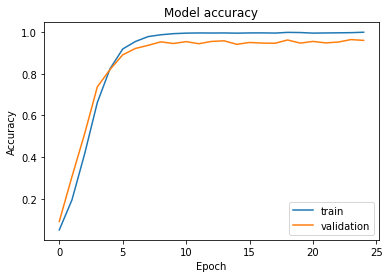

In [35]:
#Plots the training and validation accuracy.
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

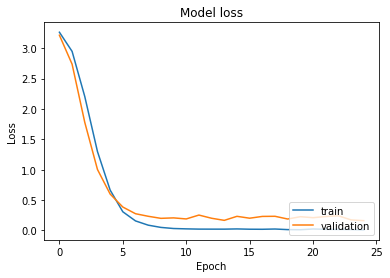

In [36]:
#Plots the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'validation'], loc='lower right')
plt.show()

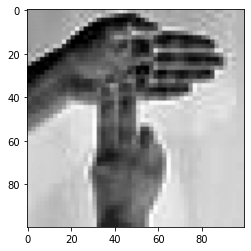

N


In [37]:
#Used to pick an image from the test data.
plt.imshow(test_data[1501].reshape(100,100), cmap = plt.cm.binary)
plt.show()

#Predicts the image selected.
prediction  = model.predict(test_data)
prediction = (np.round(np.argmax(prediction[1501])))
prediction = numb_to_alpha(prediction)
print(prediction)

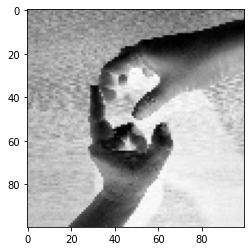

In [38]:
#Loads a new image not included in any dataset.

img = cv2.imread('k.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img= cv2.resize(img, dsize=(100,100), interpolation = cv2.INTER_CUBIC)
plt.imshow(img)
img.shape

img = np.expand_dims(img, axis = 0)
img = np.expand_dims(img, axis = 3)
img = img.astype('float32')
img = img/255
plt.imshow(img.reshape(100,100), cmap = plt.cm.binary)

In [39]:
#Predicts the new image.
prediction = model.predict(img)
prediction = (np.round(np.argmax(prediction)))
prediction = numb_to_alpha(prediction)
print(prediction)

K


In [41]:
#Piece of code for error analysis in the test data. 
#Prints the real value and predicted value.
#Also prints an array of size 26, showing the mispredicted values of each alphabet.

prediction  = model.predict(test_data)
num_wrong = np.zeros(26)
tot_Wrong = 0
for i in range(2522):
  predVal = (np.round(np.argmax(prediction[i])))
  predVal = numb_to_alpha(predVal)
  realVal = np.argmax(y_test[i])
  realVal = numb_to_alpha(realVal)
  if(predVal!=realVal):# and (realVal=="N"):
    num_wrong[np.argmax(np.round(y_test[i]))]+=1
    tot_Wrong+=1
    
    print(i+1,") Real value = ",realVal ,", Predicted value= ",predVal)
    

print(num_wrong)
print("Total Wrong = ", tot_Wrong)

62 ) Real value =  A , Predicted value=  E
148 ) Real value =  T , Predicted value=  I
149 ) Real value =  M , Predicted value=  B
169 ) Real value =  O , Predicted value=  B
209 ) Real value =  N , Predicted value=  O
220 ) Real value =  T , Predicted value=  P
230 ) Real value =  X , Predicted value=  Z
300 ) Real value =  T , Predicted value=  X
471 ) Real value =  J , Predicted value=  O
536 ) Real value =  V , Predicted value=  I
539 ) Real value =  T , Predicted value=  U
542 ) Real value =  K , Predicted value=  D
561 ) Real value =  N , Predicted value=  E
647 ) Real value =  R , Predicted value=  E
685 ) Real value =  M , Predicted value=  P
739 ) Real value =  F , Predicted value=  I
766 ) Real value =  I , Predicted value=  M
900 ) Real value =  N , Predicted value=  F
938 ) Real value =  J , Predicted value=  O
1004 ) Real value =  N , Predicted value=  K
1021 ) Real value =  Q , Predicted value=  N
1095 ) Real value =  A , Predicted value=  C
1125 ) Real value =  M , Predi

In [42]:
#Piece of code to display arrays(training and testing), showing the number of images for each alphabet.
test1 = np.zeros(26)
train1 = np.zeros(26) 
for i in range(2522):
  test1[np.argmax(np.round(y_test[i]))]+=1
for i in range(10114):
  train1[np.argmax(np.round(y_train[i]))]+=1

print(train1)
print(test1)

[389. 389. 389. 389. 389. 389. 389. 389. 389. 389. 389. 389. 389. 389.
 389. 389. 389. 389. 389. 389. 389. 389. 389. 389. 389. 389.]
[97. 97. 97. 97. 97. 97. 97. 97. 97. 97. 97. 97. 97. 97. 97. 97. 97. 97.
 97. 97. 97. 97. 97. 97. 97. 97.]


In [43]:
prediction = np.round(np.argmax(model.predict(test_data), axis = 1))

#prediction=np.argmax(prediction, axis=1) 
rounded_labels=np.argmax(y_test, axis=1)
f1_score(rounded_labels, prediction, average='macro')

0.9764366620494536

Fscore is usually between 0 to 1. 0 means bad classifier and 1 means good. Our model's f_score is 0.9712 which would mean it is a good classifier. 

"The F score reaches the best value, meaning perfect precision and recall, at a value of 1. The worst F score, which means lowest precision and lowest recall, would be a value of 0."

In [44]:
#rounded_labels=np.argmax(y_test, axis=1)


In [47]:
#printing the multi-label confusion matrix
multilabel_confusion_matrix(rounded_labels, prediction)

array([[[2424,    1],
        [   3,   94]],

       [[2422,    3],
        [   0,   97]],

       [[2423,    2],
        [   0,   97]],

       [[2424,    1],
        [   1,   96]],

       [[2420,    5],
        [   2,   95]],

       [[2423,    2],
        [   1,   96]],

       [[2425,    0],
        [   0,   97]],

       [[2423,    2],
        [   0,   97]],

       [[2420,    5],
        [   2,   95]],

       [[2425,    0],
        [   2,   95]],

       [[2421,    4],
        [   3,   94]],

       [[2422,    3],
        [   0,   97]],

       [[2420,    5],
        [   5,   92]],

       [[2421,    4],
        [  14,   83]],

       [[2421,    4],
        [   1,   96]],

       [[2422,    3],
        [   0,   97]],

       [[2425,    0],
        [   4,   93]],

       [[2425,    0],
        [   2,   95]],

       [[2425,    0],
        [   4,   93]],

       [[2423,    2],
        [   7,   90]],

       [[2423,    2],
        [   1,   96]],

       [[2425,    0],
        [   

This is a multilabel confusion matrix. Each of the nested matrices represents a class (alphabet in our case). 
Multiclass data will be treated as if binarized under a one-vs-rest transformation. Returned confusion matrices will be in the order of sorted unique labels in the union of (y_true, y_pred). 

In the matrix:

00 = true negatives

10 = false negatives

11 = true positives

01 = false negatives

In [48]:
#printing the classification report
print(classification_report(rounded_labels, prediction))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98        97
           1       0.97      1.00      0.98        97
           2       0.98      1.00      0.99        97
           3       0.99      0.99      0.99        97
           4       0.95      0.98      0.96        97
           5       0.98      0.99      0.98        97
           6       1.00      1.00      1.00        97
           7       0.98      1.00      0.99        97
           8       0.95      0.98      0.96        97
           9       1.00      0.98      0.99        97
          10       0.96      0.97      0.96        97
          11       0.97      1.00      0.98        97
          12       0.95      0.95      0.95        97
          13       0.95      0.86      0.90        97
          14       0.96      0.99      0.97        97
          15       0.97      1.00      0.98        97
          16       1.00      0.96      0.98        97
          17       1.00    

The recall means "how many of this class you find over the whole number of element of this class"

The precision will be "how many are correctly classified among that class"

The f1-score is the harmonic mean between precision & recall

The support is the number of occurence of the given class in your dataset

In [50]:
#calculating the ROC score
def multiclass_roc_auc_score(y_test, prediction, average="macro"):
  lb = preprocessing.LabelBinarizer()
  lb.fit(y_test)
  y_test = lb.transform(y_test)
  y_pred = lb.transform(prediction)
  return roc_auc_score(y_test, y_pred, average=average) 

In [51]:
score = multiclass_roc_auc_score(y_test, prediction)

In [52]:
print(score)

0.9878350515463918


Receiver Operating Characteristic (ROC) is used to evaluate classifier output quality. Roc score is usually between 0.5 to 1. 0.5 means bad classifier and 1 means good classifier. 

For our model, the value is 0.985 which means that the classifier is good. 

I have used LabelBinarizer becasue we had multiple classes. It's much easier with binary but since we have multiple classes we need to convert it.  